In [29]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [54]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = Path("Resources/lending_data.csv")
lending_df = pd.read_csv(path)

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [10]:
# Separate the data into labels and features
print(lending_df.columns)
# # Separate the y variable, the labels
y = lending_df["loan_status"]

# # Separate the X variable, the features
X = lending_df.drop(columns="loan_status")

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')


In [11]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [12]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [13]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [14]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [35]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(10)

,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
68423,0,0
37714,0,0
64870,0,0
47959,0,0
49,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[18679,    80],
       [   67,   558]])

Confusion matrix:
[[18679    80]
 [   67   558]]


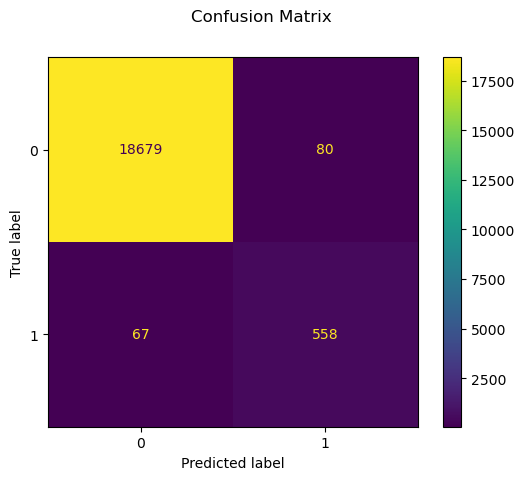

In [52]:
#Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [44]:
# Print the classification report for the model
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     18759
     Class 1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [51]:
#Overal accuracy
print("Overall accuracy: " + str((18679+558)/(18679+558+80+67)))
print("---------------------------------------")
print("Precision Class 0: " + str(16879/(16879 + 67)))
print("Recall Class 0: " + str(16879/(16879+80)))
print("---------------------------------------")
print("Precision Class 1: " + str(558/(558+80)))
print("Recall Class 1: " + str(558 / (558 + 67)))



Overall accuracy: 0.9924164259182832
---------------------------------------
Precision Class 0: 0.9960462646052166
Recall Class 0: 0.9952827407276372
---------------------------------------
Precision Class 1: 0.8746081504702194
Recall Class 1: 0.8928


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model is able to predict healthly loans to a 99.6% precision and recall of 99.5% compared to high-risk loans at 87.4% precision and 89.2% recall. Our model has an accuracy of 99.2% overall

---